In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Suppress warnings and set up visualization settings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['figure.dpi'] = 500

In [3]:
# Load dataset
data = pd.read_csv('/content/Heart disease.csv',index_col=0)

In [4]:
# Overview of the data
print(data.head())
print(data.describe())
print(data.info())

      sex               cp  trestbps  chol    fbs         restecg  thalch  \
age                                                                         
63   Male   typical angina       145   233   True  lv hypertrophy     150   
41   Male  atypical angina       135   203  False          normal     132   
57   Male     asymptomatic       140   192  False          normal     148   
52   Male   typical angina       118   186  False  lv hypertrophy     190   
57   Male     asymptomatic       110   201  False          normal     126   

     exang  oldpeak        slope          thal  num  
age                                                  
63   FALSE      2.3  downsloping  fixed defect    0  
41   FALSE      0.0         flat  fixed defect    0  
57   FALSE      0.4         flat  fixed defect    0  
52   FALSE      0.0         flat  fixed defect    0  
57    TRUE      1.5         flat  fixed defect    0  
         trestbps        chol      thalch     oldpeak         num
count  908.00000

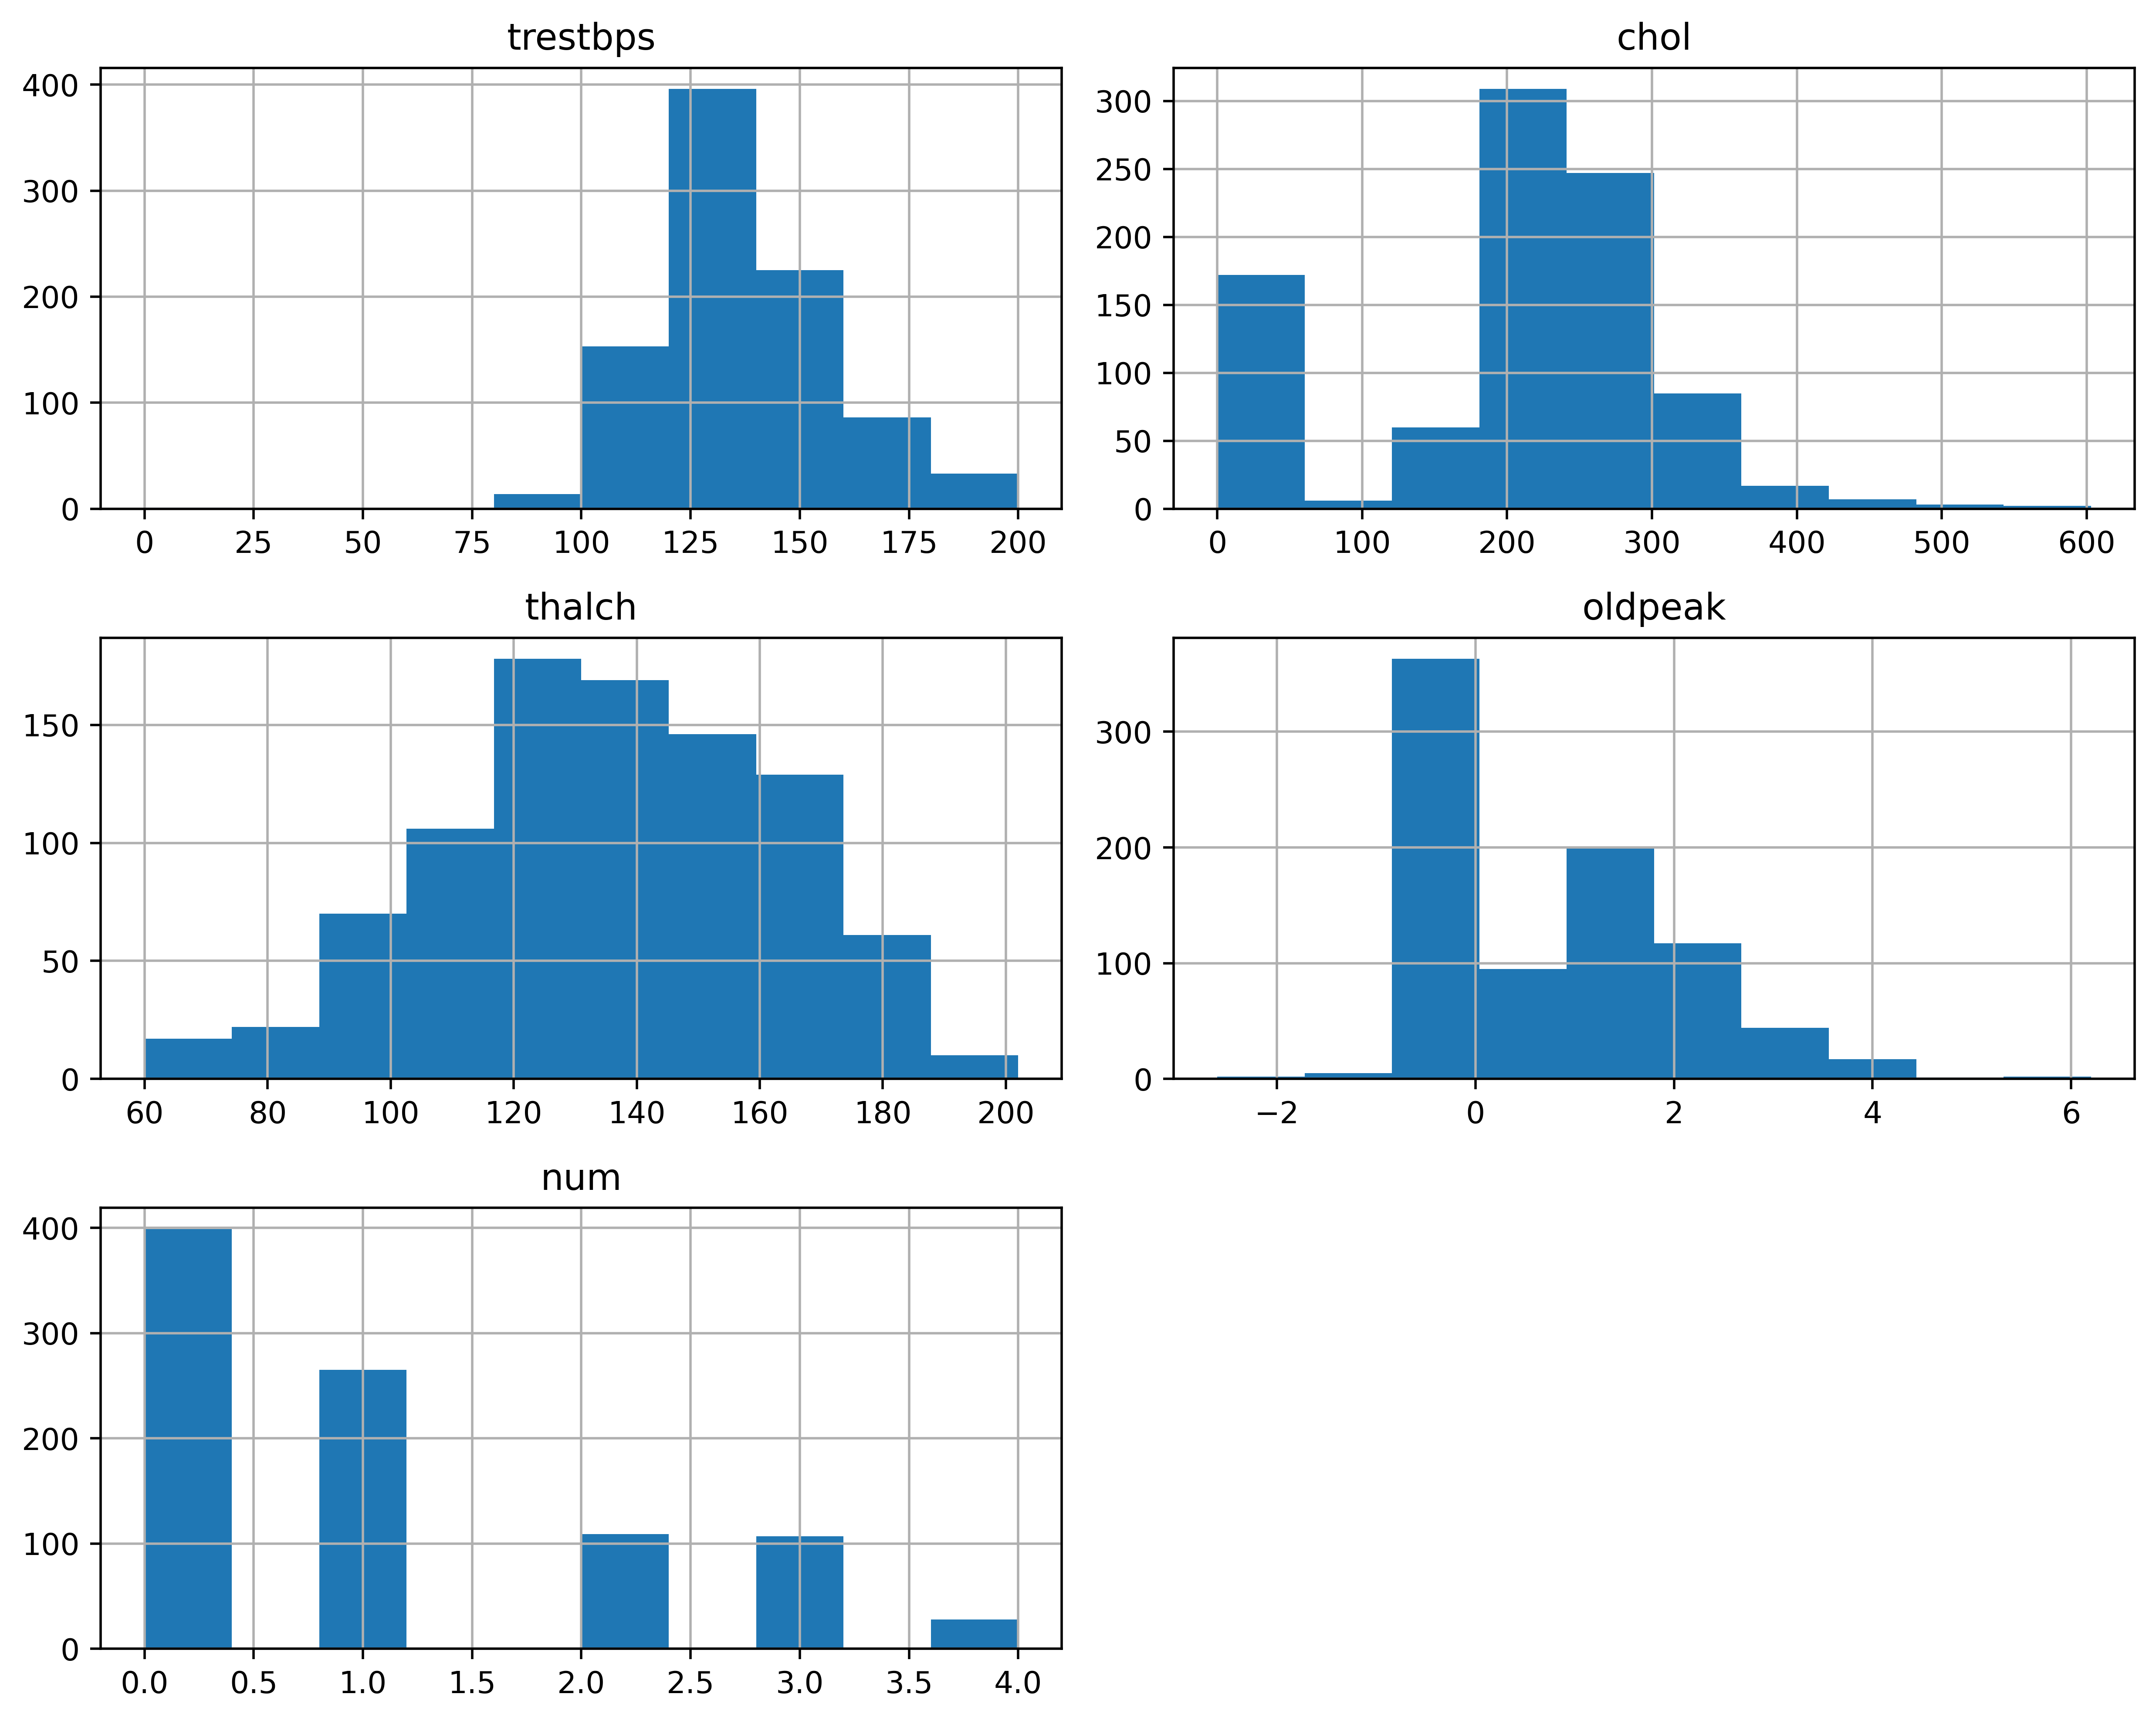

In [5]:
# Visualizing the distribution of each feature
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [6]:
# Calculating missing value percentages
missing_percentage = data.isna().mean() * 100
print("Missing values (%):\n", missing_percentage[missing_percentage > 0])

Missing values (%):
 oldpeak    6.828194
dtype: float64


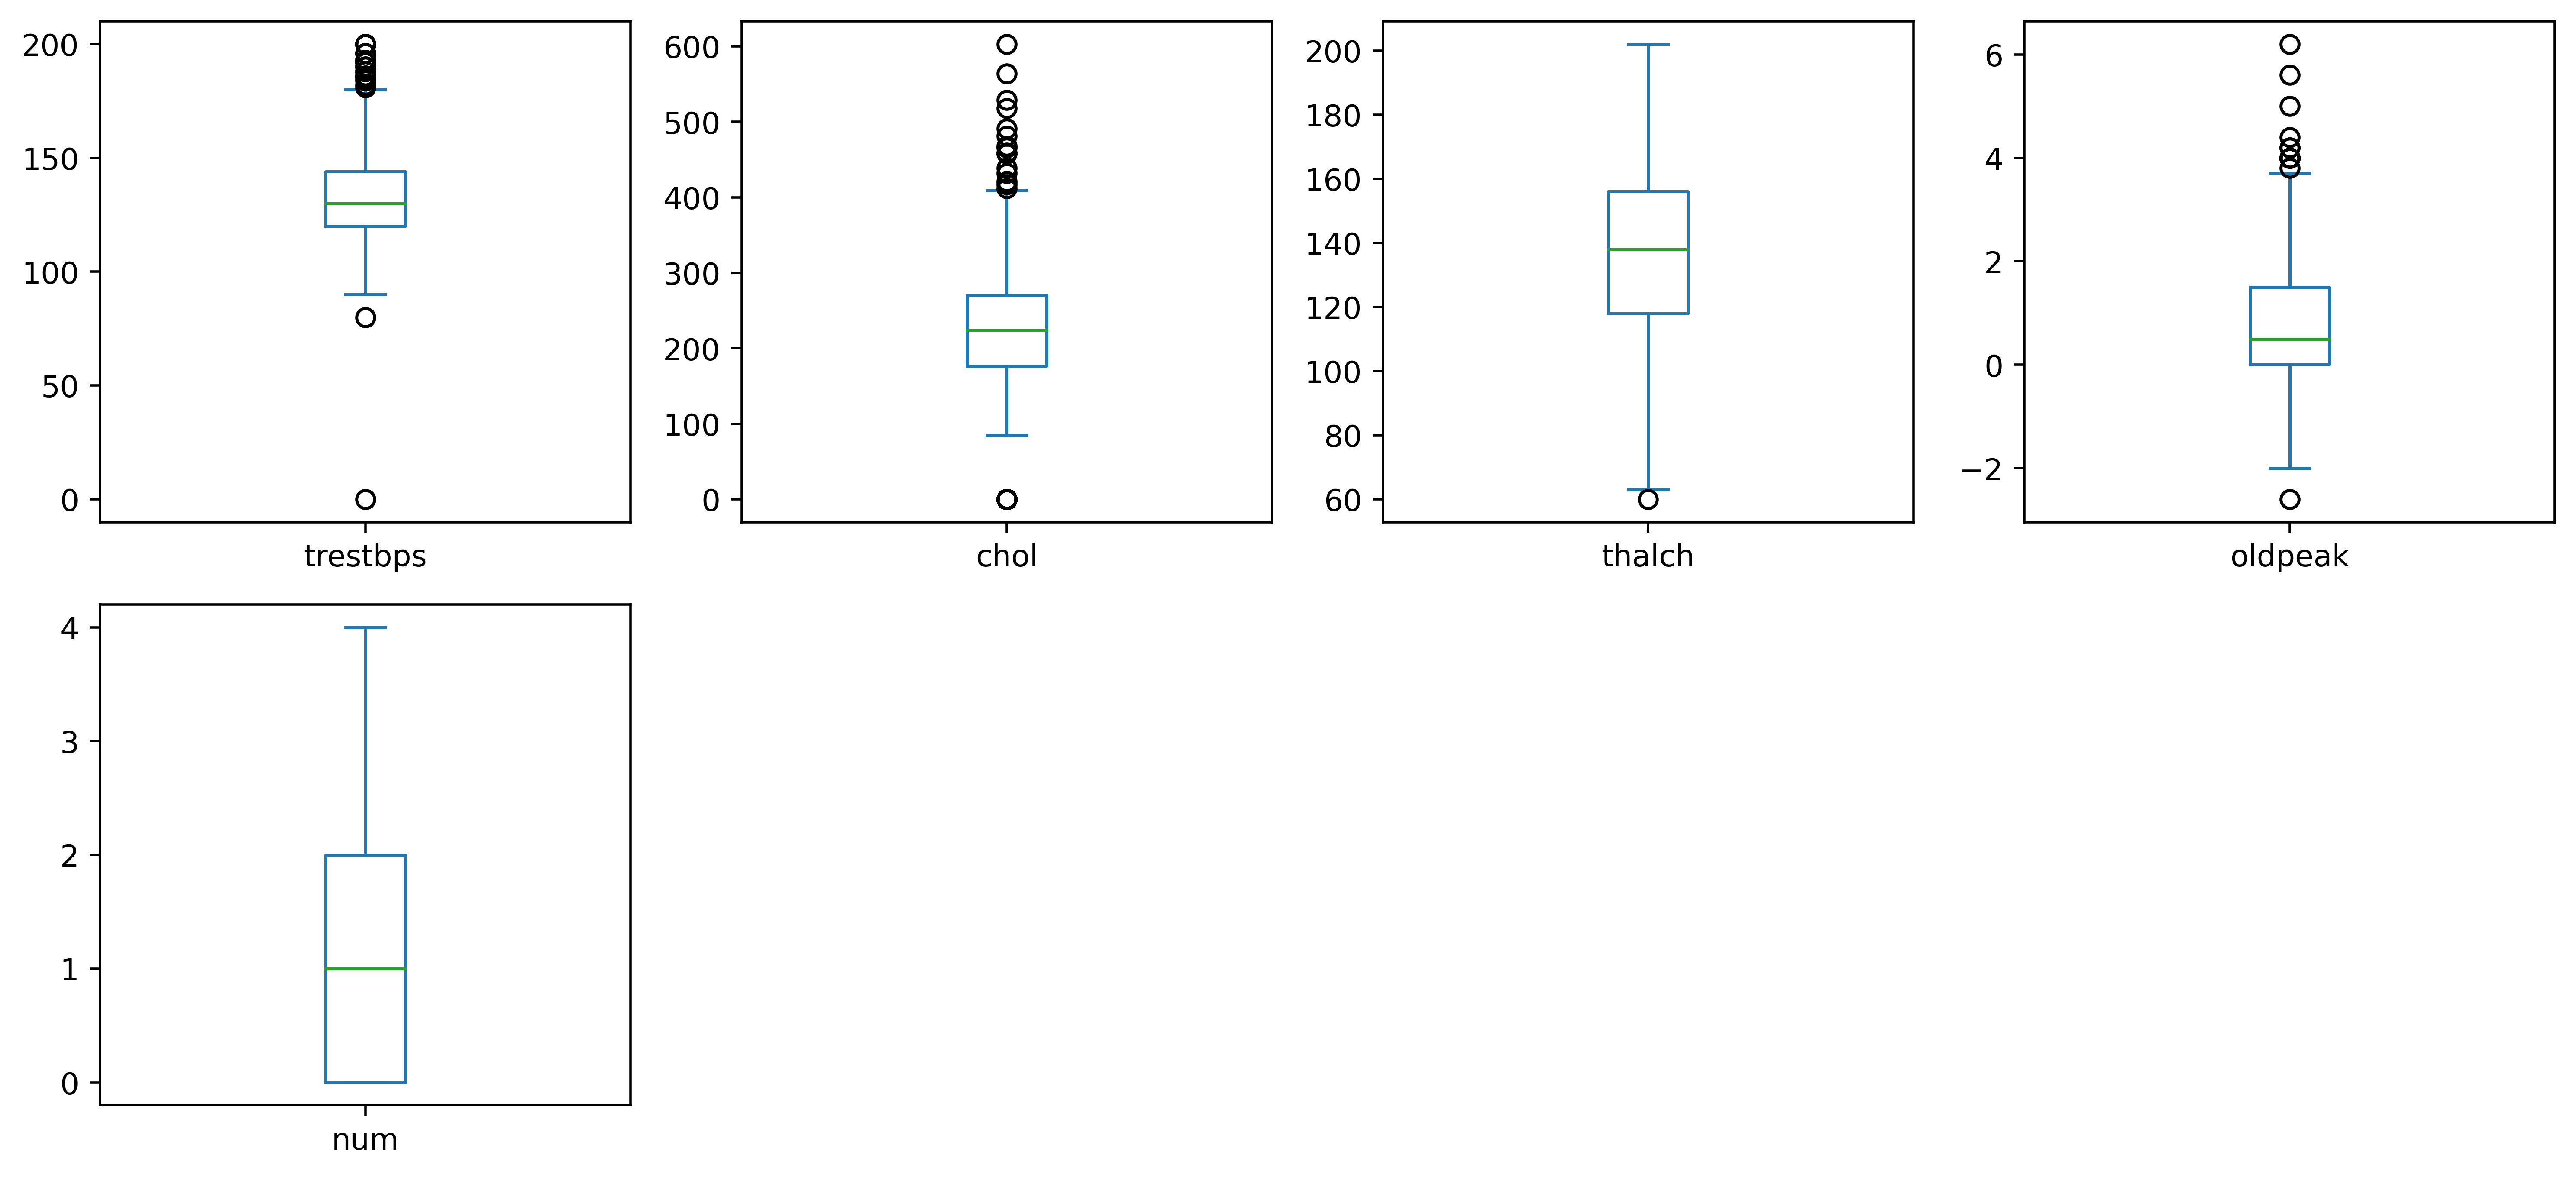

In [7]:
# Box plot to check for outliers
data.plot(kind='box', subplots=True, layout=(3, 4), figsize=(12, 8), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

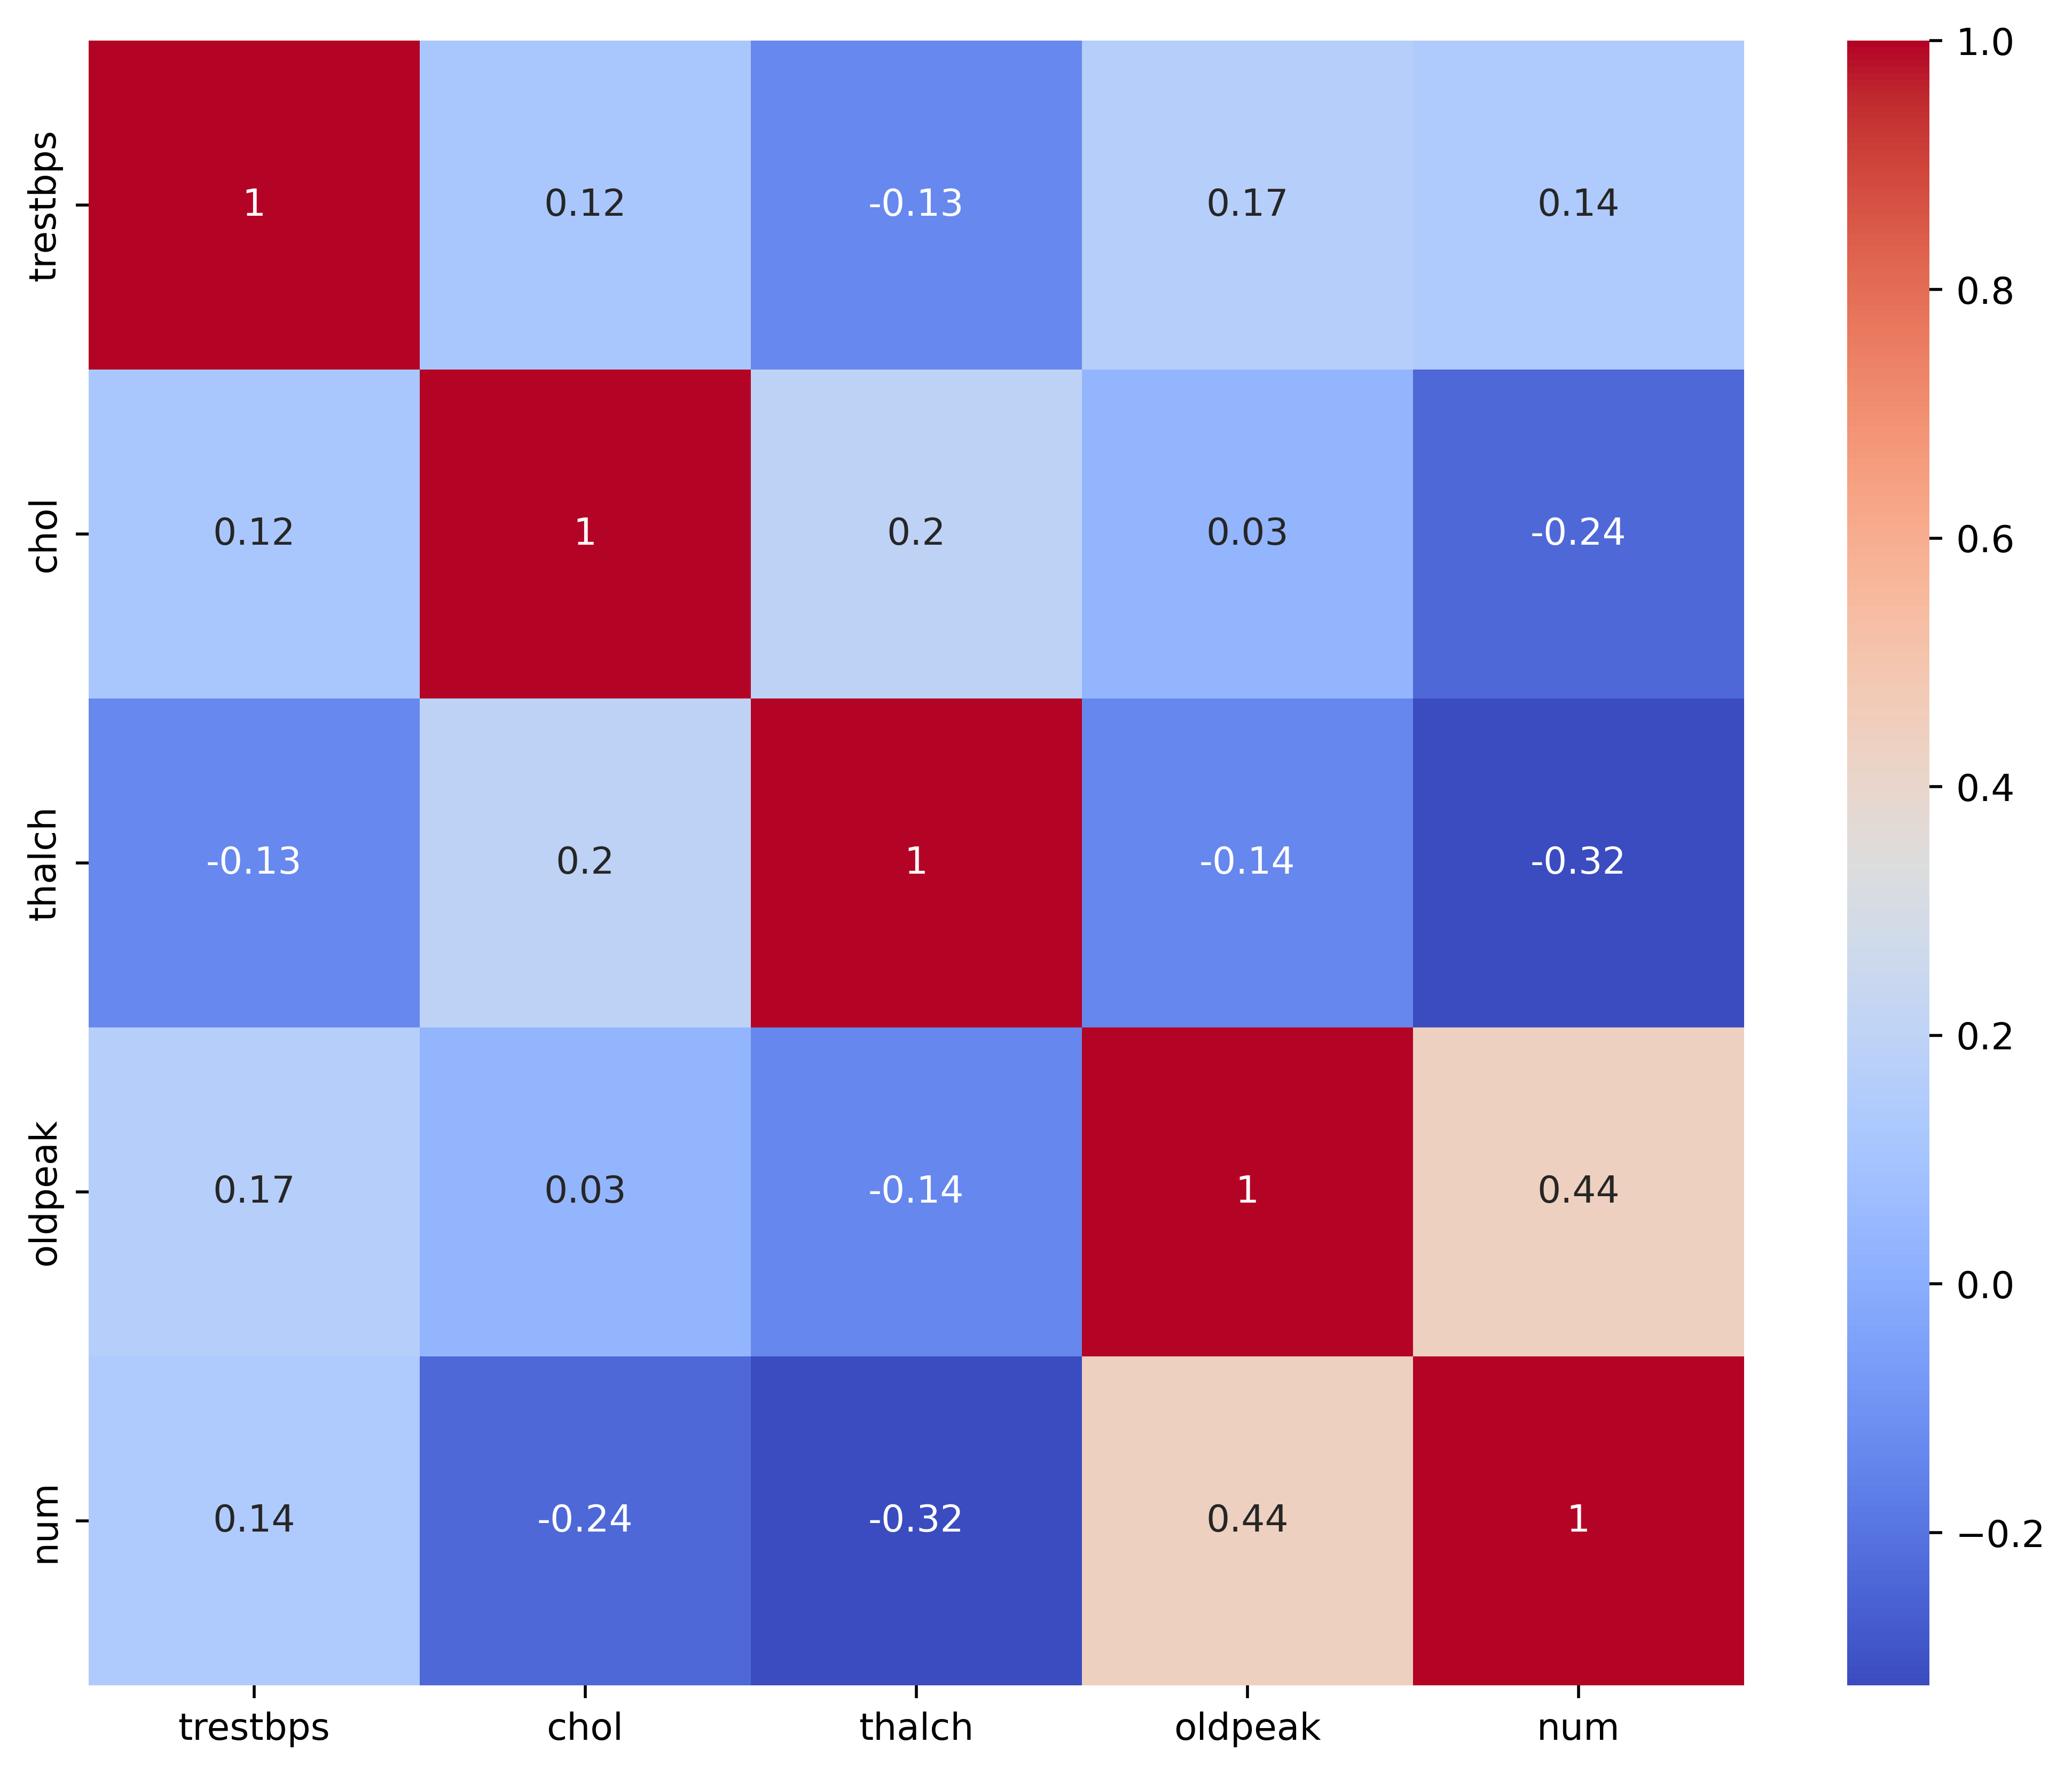

In [8]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.show()

In [9]:
# Feature Engineering: Encoding categorical variables and scaling numerical features
data['sex'] = data['sex'].astype('category')
data['cp'] = data['cp'].astype('category')


In [10]:
# One-hot encoding
data = pd.get_dummies(data, columns=['sex', 'cp'], drop_first=True)

In [11]:
# Split the dataset into features and target variable
X = data.drop('restecg', axis=1)  # Features (drop target column)
y = data['restecg']  # Target column

In [22]:
# Scaling numerical features
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [24]:
# Encoding categorical features using One-Hot Encoding
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [25]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Encoding any object-type columns in the test set (if applicable)
encoder = LabelEncoder()
for col in X_test.select_dtypes(include=['object']).columns:
    X_test[col] = encoder.fit_transform(X_test[col])


In [27]:
# Initializing and training the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42, criterion='entropy')
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [28]:
# Making predictions
y_pred = dt_model.predict(X_test)

In [29]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test), multi_class='ovr', average='macro')

In [30]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

Accuracy: 0.48
Precision: 0.37
Recall: 0.37
F1-Score: 0.37
ROC-AUC: 0.52


In [31]:
# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}


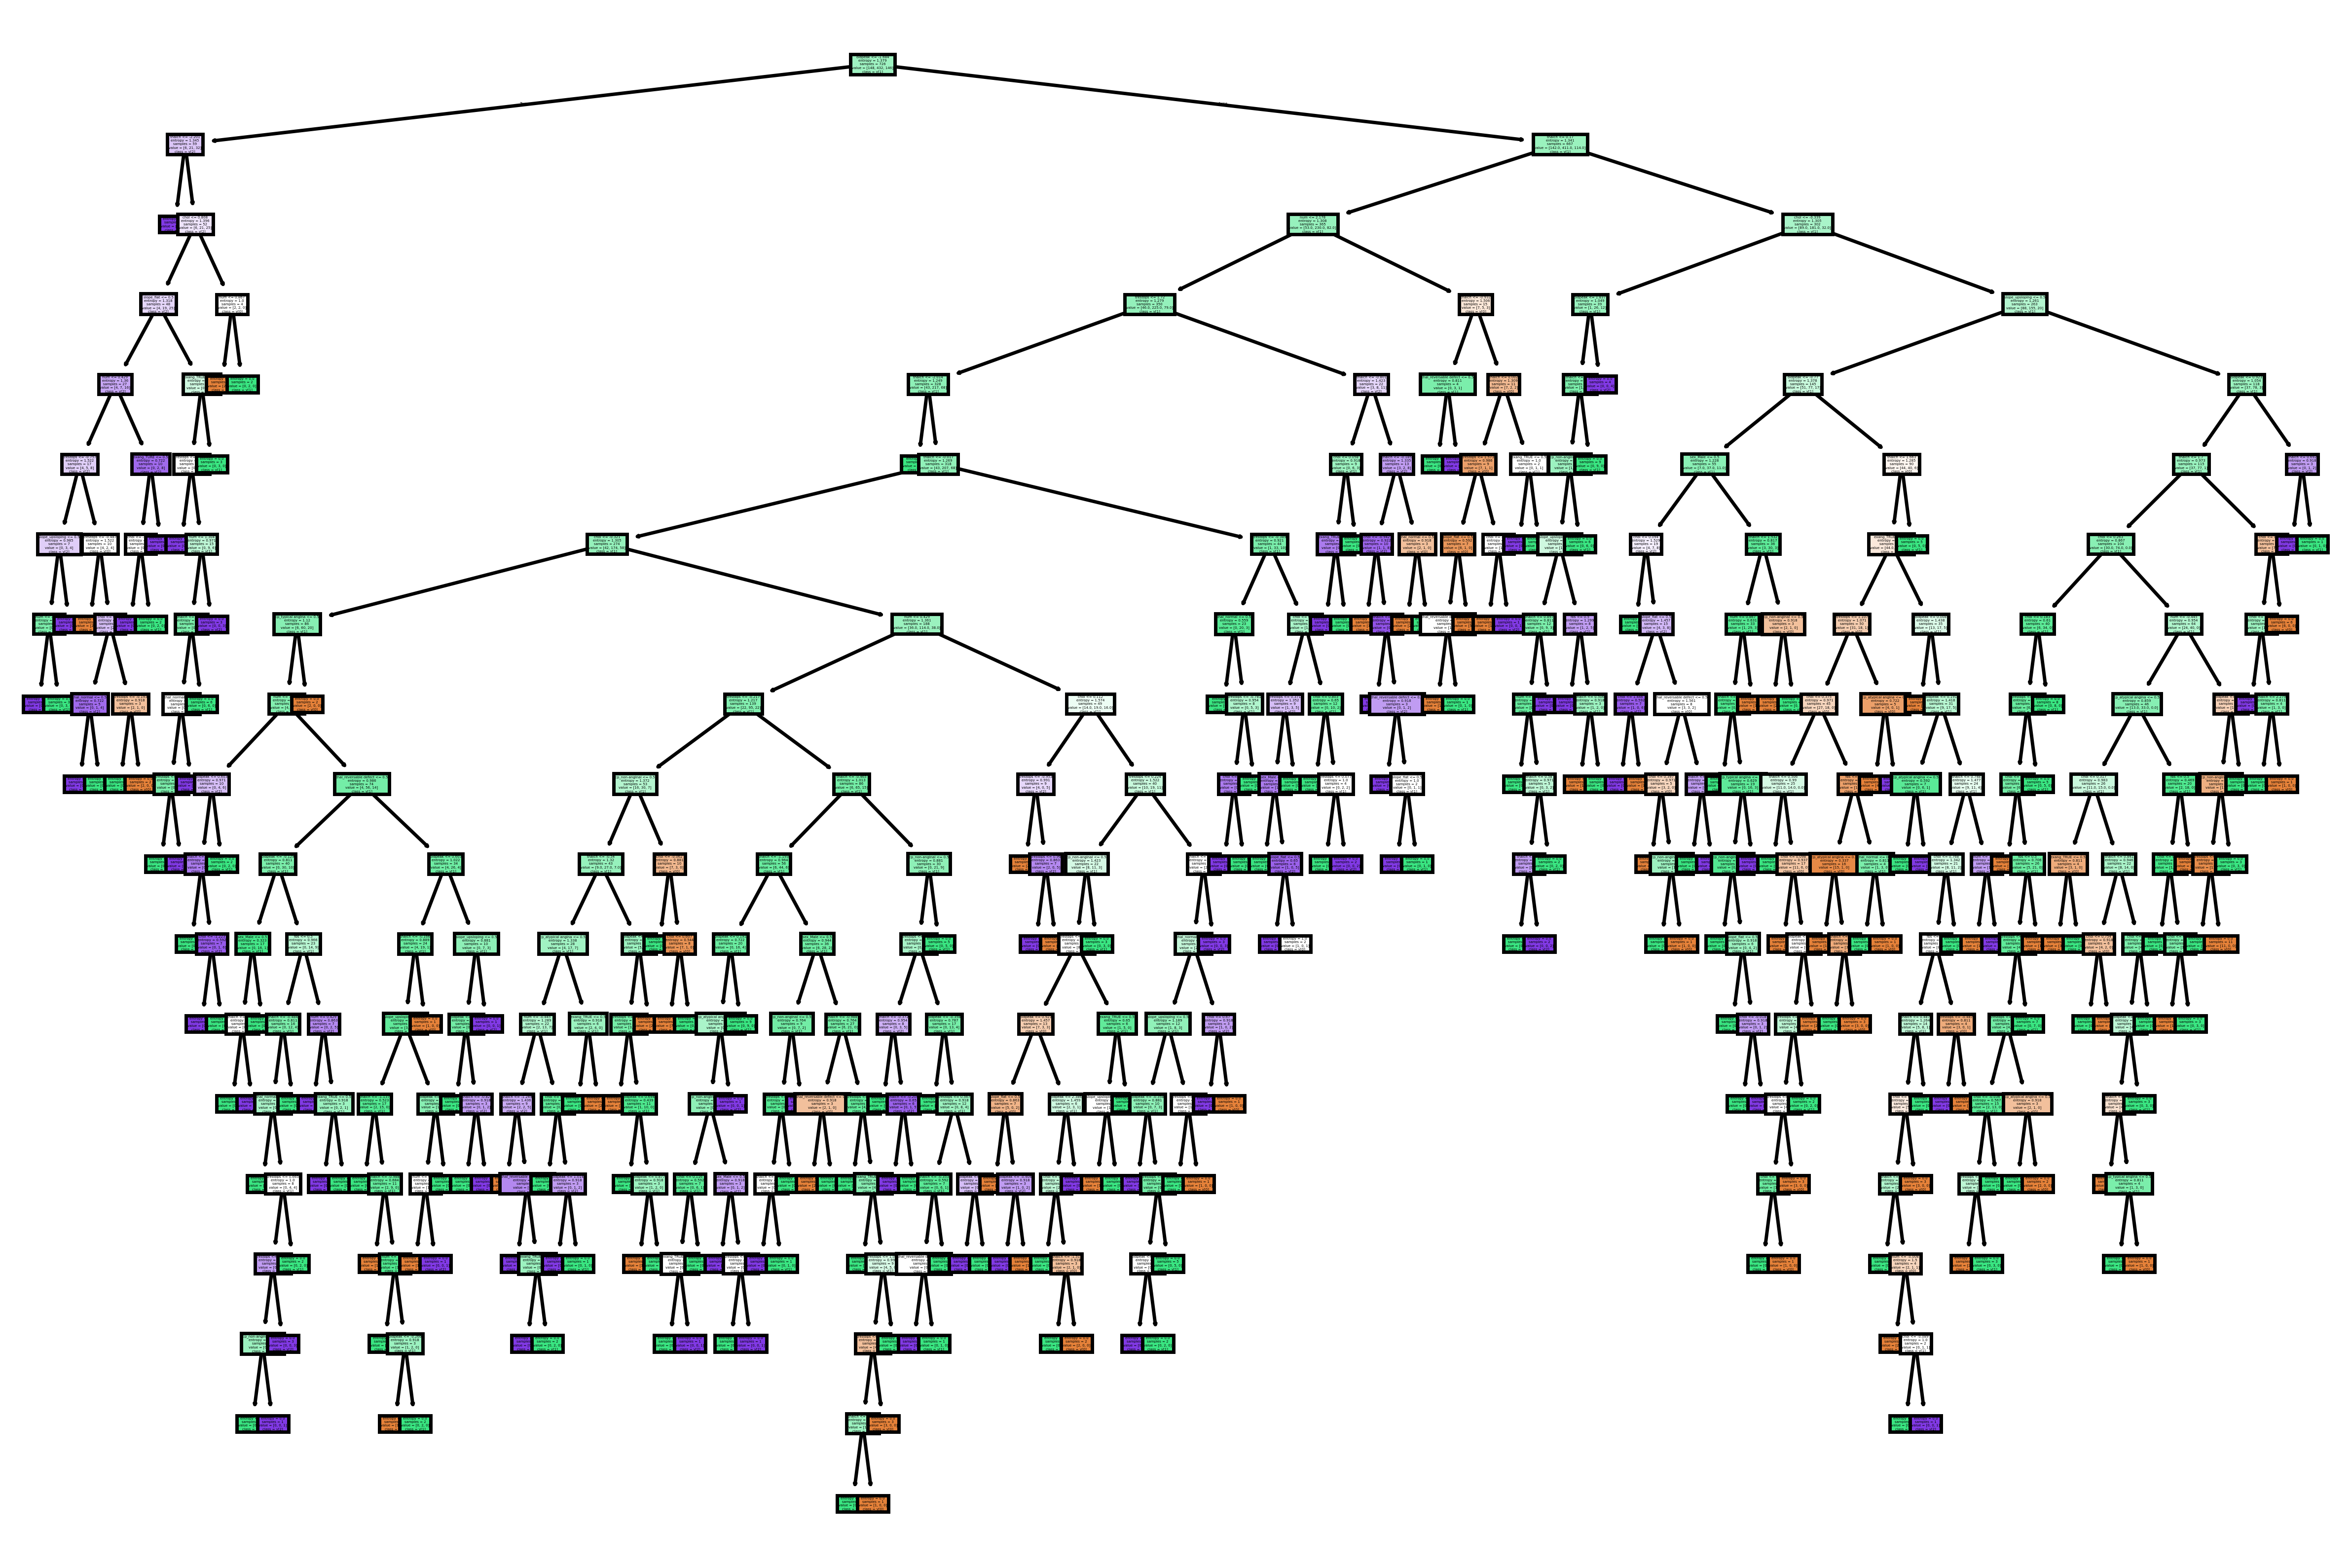

In [33]:
from sklearn import tree # Import the 'tree' module from sklearn

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=True) # Now 'tree' is recognized
plt.show()

In [ ]:
#Interview Questions

### 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
###Ans:- 1.Max Depth: Limits the maximum depth of the tree; preventing overfitting.
#        2.Min Samples Split: Minimum number of samples required to split an internal node; controls tree growth.
#        3.Min Samples Leaf: Minimum number of samples required to be at a leaf node; helps smooth the model.
#        4.Max Features: The number of features to consider when looking for the best split; reduces overfitting.


In [ ]:
#Interview Questions

### 2. What is the difference between the Label encoding and One-hot encoding?
###Ans:-1.Label Encoding: Converts categorical variables into integers. It assigns a unique integer to each category but can imply an ordinal relationship.
#       2. One-Hot Encoding: Converts categorical variables into a binary matrix (0s and 1s) where each category is represented as a separate column. This avoids implying any ordinal relationship.